In [1]:
'''
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
'''
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
from pandas import read_csv
import math
import keras
from keras.callbacks import TensorBoard
from keras.layers import Dense , LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# load the dataset
dataframe = read_csv('C:\\Users\\vinayak tyagi\\Downloads\\international-airline-passengers.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print(dataset)
len(dataset)

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

144

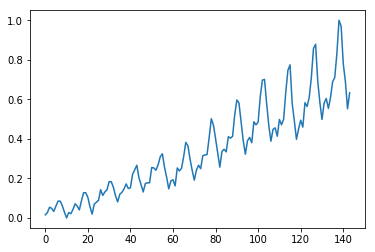

In [3]:
plt.plot(dataset)

In [4]:
# now for output we have
def fet(lst):
    X = []
    Y = []
    for i in range(len(lst)-2):
        z =  list(lst[i+1])
        Y.append(z[0])
    
    print(Y)
    return Y
        
feat = fet(dataset)
len(feat)

[0.027027026, 0.05405405, 0.04826255, 0.032818526, 0.059845567, 0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.0, 0.027027026, 0.021235526, 0.042471036, 0.07142857, 0.059845567, 0.040540546, 0.08687258, 0.12741312, 0.12741312, 0.10424709, 0.055984557, 0.01930502, 0.06949806, 0.07915059, 0.08880308, 0.14285713, 0.11389962, 0.13127413, 0.14285713, 0.18339768, 0.18339768, 0.15444016, 0.11196911, 0.08108109, 0.1196911, 0.12934363, 0.14671814, 0.17181468, 0.14864865, 0.15250966, 0.22007722, 0.24324325, 0.26640925, 0.2027027, 0.16795367, 0.13127413, 0.17374519, 0.17760617, 0.17760617, 0.25482625, 0.25289574, 0.24131274, 0.26833975, 0.3088803, 0.32432434, 0.25675675, 0.20656371, 0.14671814, 0.18725869, 0.19305018, 0.16216215, 0.25289574, 0.23745173, 0.25096524, 0.3088803, 0.38223937, 0.36486486, 0.2992278, 0.24131274, 0.1911197, 0.24131274, 0.26640925, 0.24903473, 0.31467178, 0.3185328, 0.32046333, 0.4073359, 0.5019305, 0.46911195, 0.40154442, 0.32818535, 0.25675675, 0.3359073, 0.34749034,

142

In [5]:
dataset = numpy.delete(dataset,len(dataset)-1,0)
dataset = numpy.delete(dataset,len(dataset)-2,0)
print(dataset)
len(dataset)

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

142

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, feat, test_size=0.33,shuffle=False)

print(X_train); print(y_train)


[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

In [7]:
# X_train = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_train = X_train.reshape(-1,1,X_train.shape[1])
print(X_train)

y_train  = numpy.array(y_train)
print(y_train)


X_test = X_test.reshape(-1,1,X_test.shape[1])
print(X_test)

[[[0.01544401]]

 [[0.02702703]]

 [[0.05405405]]

 [[0.04826255]]

 [[0.03281853]]

 [[0.05984557]]

 [[0.08494207]]

 [[0.08494207]]

 [[0.06177607]]

 [[0.02895753]]

 [[0.        ]]

 [[0.02702703]]

 [[0.02123553]]

 [[0.04247104]]

 [[0.07142857]]

 [[0.05984557]]

 [[0.04054055]]

 [[0.08687258]]

 [[0.12741312]]

 [[0.12741312]]

 [[0.10424709]]

 [[0.05598456]]

 [[0.01930502]]

 [[0.06949806]]

 [[0.07915059]]

 [[0.08880308]]

 [[0.14285713]]

 [[0.11389962]]

 [[0.13127413]]

 [[0.14285713]]

 [[0.18339768]]

 [[0.18339768]]

 [[0.15444016]]

 [[0.11196911]]

 [[0.08108109]]

 [[0.1196911 ]]

 [[0.12934363]]

 [[0.14671814]]

 [[0.17181468]]

 [[0.14864865]]

 [[0.15250966]]

 [[0.22007722]]

 [[0.24324325]]

 [[0.26640925]]

 [[0.2027027 ]]

 [[0.16795367]]

 [[0.13127413]]

 [[0.17374519]]

 [[0.17760617]]

 [[0.17760617]]

 [[0.25482625]]

 [[0.25289574]]

 [[0.24131274]]

 [[0.26833975]]

 [[0.3088803 ]]

 [[0.32432434]]

 [[0.25675675]]

 [[0.20656371]]

 [[0.14671814]

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(2, input_shape=(1, 1)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Saving the model in tensorborad
tensorboard = TensorBoard(log_dir='F:\\Python Projects\\GRAPH\\Vinayak_rnn_flight_GRAPH', histogram_freq=0,write_graph=True, write_images=True)

In [10]:
model.fit(X_train, y_train, epochs=120, batch_size=1, verbose=2, callbacks=[tensorboard])

Epoch 1/120
 - 1s - loss: 0.0294 - acc: 0.0105
Epoch 2/120
 - 0s - loss: 0.0144 - acc: 0.0105
Epoch 3/120
 - 0s - loss: 0.0127 - acc: 0.0105
Epoch 4/120
 - 0s - loss: 0.0120 - acc: 0.0105
Epoch 5/120
 - 0s - loss: 0.0112 - acc: 0.0105
Epoch 6/120
 - 0s - loss: 0.0104 - acc: 0.0105
Epoch 7/120
 - 0s - loss: 0.0096 - acc: 0.0105
Epoch 8/120
 - 0s - loss: 0.0087 - acc: 0.0105
Epoch 9/120
 - 0s - loss: 0.0079 - acc: 0.0105
Epoch 10/120
 - 0s - loss: 0.0070 - acc: 0.0105
Epoch 11/120
 - 0s - loss: 0.0062 - acc: 0.0105
Epoch 12/120
 - 0s - loss: 0.0055 - acc: 0.0105
Epoch 13/120
 - 0s - loss: 0.0048 - acc: 0.0105
Epoch 14/120
 - 0s - loss: 0.0041 - acc: 0.0105
Epoch 15/120
 - 0s - loss: 0.0036 - acc: 0.0105
Epoch 16/120
 - 0s - loss: 0.0031 - acc: 0.0105
Epoch 17/120
 - 0s - loss: 0.0029 - acc: 0.0105
Epoch 18/120
 - 0s - loss: 0.0026 - acc: 0.0105
Epoch 19/120
 - 0s - loss: 0.0024 - acc: 0.0105
Epoch 20/120
 - 0s - loss: 0.0024 - acc: 0.0105
Epoch 21/120
 - 0s - loss: 0.0022 - acc: 0.0105
E

In [11]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

print(trainPredict); print(testPredict)

[[0.02675681]
 [0.03652416]
 [0.05975669]
 [0.05472818]
 [0.0414515 ]
 [0.0648115 ]
 [0.08700432]
 [0.08700432]
 [0.06650216]
 [0.03816342]
 [0.01392122]
 [0.03652416]
 [0.03162576]
 [0.04972648]
 [0.07499745]
 [0.0648115 ]
 [0.04806531]
 [0.08872999]
 [0.12551974]
 [0.12551974]
 [0.10437258]
 [0.06143877]
 [0.02999947]
 [0.07329285]
 [0.08184273]
 [0.09045824]
 [0.13978408]
 [0.11314549]
 [0.12907402]
 [0.13978408]
 [0.1777623 ]
 [0.1777623 ]
 [0.15056108]
 [0.1113864 ]
 [0.08356067]
 [0.11843591]
 [0.12729588]
 [0.14336924]
 [0.16684061]
 [0.14516453]
 [0.1487605 ]
 [0.21264656]
 [0.23485948]
 [0.2571658 ]
 [0.19607139]
 [0.16321181]
 [0.12907402]
 [0.1686573 ]
 [0.172295  ]
 [0.172295  ]
 [0.24600337]
 [0.24414462]
 [0.23300436]
 [0.25902766]
 [0.29817885]
 [0.31309596]
 [0.24786259]
 [0.19974747]
 [0.14336924]
 [0.18141402]
 [0.18690129]
 [0.1577803 ]
 [0.24414462]
 [0.22929606]
 [0.24228646]
 [0.29817885]
 [0.36883485]
 [0.3521627 ]
 [0.28885278]
 [0.23300436]
 [0.18507095]
 [0.23

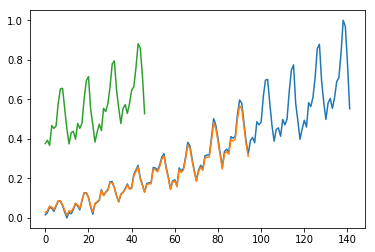

In [12]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()